In [1]:
import matplotlib.pyplot as plt
from numpy import sign

In [2]:
def calculate_acceleration(v, k=0.0, mass=1.0, gravity=-9.81):
    '''
    Calculate the acceleration based on combined forces from gravity and 
    air resistance.
    Args:
        v (float) : 
            velocity (m/s) for this time step
        k (float) : 
            Combined air resistance coefficient, based on F=-kv^2. 
            Should be positive.
            Default = 0.0  i.e. no air resistance
        mass (float) : 
            Mass of the falling object. Needed if k > 0.
            Default = 1.0
        gravity (float) :
            Value for gravity to use when calculating gravitational force in m/s2.
            Default = -9.81
    Returns:
        float : accelaration calculated for this time step
    '''
    force_gravity = mass*gravity
    force_air = -sign(v)*k*v**2
    total_force = force_gravity + force_air
    a = total_force/mass
    
    return a


def update_state(t, x, v, a, dt=0.1):
    '''
    Update each parameter for the next time step.
    Args:
        t, x, v, a (float) : 
            time (s), position (m) and velocity (m/s) and acceleration (m/s2) value for this time step.
        dt (float) :
            time interval (s) for this small time step
    Returns:
        float, float, float : Updated values for t, h, v after this time step
    '''
    distance_moved = v*dt + (1/2)*a*(dt**2)
    v += a*dt
    t += dt

    x += distance_moved
    
    return t, x, v


def falling_mass(initial_height, k=0.0, mass=1.0, dt=0.1):
    '''
    Model a falling mass from a given height.
    
    Args:
        initial_height (float) : 
            Starting height for the model in metres.
        k (float) :
            Combined air resistance coefficient, based on F=-kv^2. 
            Should be positive.
            Default = 0.0  i.e. no air resistance
        mass (float) :
            Mass of the object. Only needed if k is not 0.
            Default = 1.0  (kg)
        dt (float, optional) : 
            Time interval for each time step in seconds.
            Default = 0.1
    
    Returns:
        list, list, list : Three lists containing the time, height and velocity
    '''
    # Fixed input values
    start_velocity = 0.0 # m/s
    gravity = -9.81 # m/s2

    # Initial values for our parameters
    distance_moved = 0
    h = initial_height
    v = start_velocity
    t = 0.0

    # Create empty lists which we will update
    height = []
    velocity = []
    time = []

    # Keep looping while the object is still falling
    while h > 0:
        # Evaluate the state of the system - start by calculating the total force on the object
        a = calculate_acceleration(v, k=k, mass=mass, gravity=gravity)

        # Append values to list and then update
        height.append(h)
        velocity.append(v)
        time.append(t)

        # Update the state for time, height and velocity
        t, h, v = update_state(t, h, v, a, dt=dt)
    
    return time, height, velocity

In [3]:
t, y, vy = falling_mass(20, k=0.035)

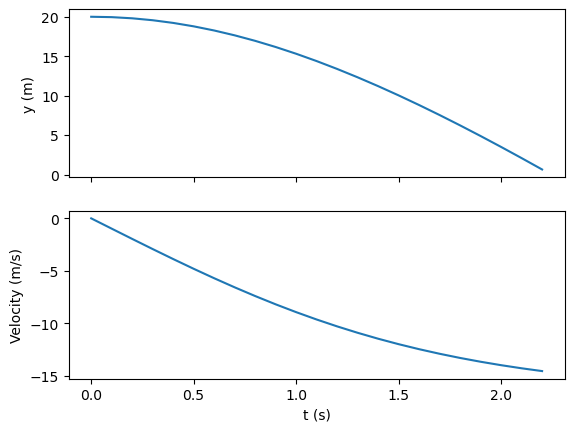

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(t, y)
ax1.set_ylabel("y (m)")

ax2.plot(t, vy)
ax2.set_ylabel("Velocity (m/s)")
ax2.set_xlabel("t (s)")

plt.show()

In [5]:
from projectile_package.projectile import flying_mass
from projectile_package.projectile_plot import plot_xy

ModuleNotFoundError: No module named 'projectile_package'

In [6]:
t, x, y, vx, vy = flying_mass(10., 10., mass=1., k=0.035)

NameError: name 'flying_mass' is not defined

In [7]:
plot_xy(x, y)

NameError: name 'plot_xy' is not defined